# Self-Organizing Map (SOM) 

***Algorithm---***

1. **Randomize the node weight vectors in a map.**
2. **For $s = 0, 1, 2, \ldots, \lambda$ (where $\lambda$ is the iteration limit):**
   - Randomly pick an input vector $D(t)$ from the input data set $\mathbf{D}$.
   - Find the node in the map closest to the input vector. This node is the best matching unit (BMU). Denote it by $u$.
   - **For each node $v$, update its vector by pulling it closer to the input vector:**
       - $$W_v(s + 1) = W_v(s) + \theta(u, v, s) \cdot \alpha(s) \cdot (D(t) - W_v(s))$$

***Variable Definitions---***
- $s$: Current iteration.
- $\lambda$: Iteration limit.
- $t$: Index of the target input data vector in the input data set $\mathbf{D}$.
- $D(t)$: Target input data vector.
- $v$: Index of the node in the map.
- $W_v$: Current weight vector of node $v$.
- $u$: Index of the best matching unit (BMU) in the map.
- $\theta(u, v, s)$: Neighborhood function.
- $\alpha(s)$: Learning rate schedule.

***Key Design Choices---***
- **Shape of the SOM**: Determines the layout of the nodes in the map.
- **Neighborhood Function**: Ensures that the BMU is updated the most, its immediate neighbors are updated less, and so on.
- **Learning Rate Schedule**: Starts with large updates at the beginning and gradually reduces the updates over time.


In [1]:
import matplotlib.pyplot as plt
import numpy as np


class SelfOrganizingMap:
    def __init__(self, x_dim, y_dim, input_dim, learning_rate=0.5, sigma=None):
        self.x_dim = x_dim  # Width of the SOM grid
        self.y_dim = y_dim  # Height of the SOM grid
        self.input_dim = input_dim  # Number of input features
        self.learning_rate = learning_rate  # Learning rate
        self.sigma = (
            sigma if sigma is not None else max(x_dim, y_dim) / 2
        )  # Neighborhood radius
        self.weights = np.random.rand(x_dim, y_dim, input_dim)  # Initialize weights

    def _neighborhood_function(self, bmu, iteration):
        x, y = np.meshgrid(np.arange(self.x_dim), np.arange(self.y_dim))
        distance = np.sqrt((x - bmu[0]) ** 2 + (y - bmu[1]) ** 2)
        return np.exp(-distance / (2 * (self.sigma**2)))

    def train(self, data, num_iterations):
        for iteration in range(num_iterations):
            for x in data:
                # Find the Best Matching Unit (BMU)
                bmu_index = self._find_bmu(x)
                bmu = (bmu_index[0], bmu_index[1])

                # Update weights
                neighborhood = self._neighborhood_function(bmu, iteration)
                self.weights += (
                    self.learning_rate
                    * neighborhood[:, :, np.newaxis]
                    * (x - self.weights)
                )

            # Decrease the learning rate and sigma over time
            self.learning_rate *= 1 - iteration / num_iterations
            self.sigma *= 1 - iteration / num_iterations

    # Find the Best Matching Unit for the input x.
    def _find_bmu(self, x):
        distances = np.linalg.norm(self.weights - x, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def get_weights(self):
        return self.weights

    def visualize_data(self, data, labels):
        plt.figure(figsize=(3, 3))
        plt.xlim(-1, self.x_dim)  # Set limits for x-axis
        plt.ylim(-1, self.y_dim)  # Set limits for y-axis

        # Get BMU coordinates for each data point
        mapped = np.array([self._find_bmu(x) for x in data])

        # Plot each data point on SOM grid at the coordinates of its corresponding BMU
        for i, coord in enumerate(mapped):
            plt.text(
                coord[0],  # x-coordinate of the BMU
                coord[1],  # y-coordinate of the BMU
                str(labels[i]),
                color=plt.cm.rainbow(labels[i] / np.max(labels)),
                fontdict={"weight": "bold", "size": 9},
                ha="center",  # Center the text horizontally
                va="center",  # Center the text vertically
            )  # Plot the class label as text at the BMU coordinate

        plt.title("Data Mapped to SOM Grid")  # Set the title of the plot
        plt.grid(True)  # Display a grid on the plot
        plt.show()

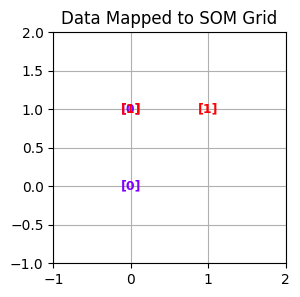

In [2]:
# Example usage
if __name__ == "__main__":
    # Define input data for XOR
    data_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    labels_xor = np.array([[0], [1], [1], [0]])  # Labels for XOR

    # Create and train the SOM
    som = SelfOrganizingMap(x_dim=2, y_dim=2, input_dim=2)
    som.train(data_xor, num_iterations=100)

    # Visualize the data mapped to the SOM grid
    som.visualize_data(data_xor, labels_xor)

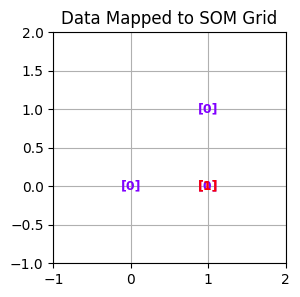

In [3]:
# Define the input data for AND,
data_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels_and = np.array([[0], [0], [0], [1]])  # AND outputs

# Create and train the SOM
som = SelfOrganizingMap(x_dim=2, y_dim=2, input_dim=2, sigma=1.0)
som.train(data_and, num_iterations=100)

# Visualize the data mapped to the SOM grid
som.visualize_data(data_and, labels_and)